[![Binder](https://mybinder.org/badge_logo.svg)](https://nbviewer.org/github/Sistemas-Multimedia/Sistemas-Multimedia.github.io/blob/master/milestones/06-YUV_compression/chroma_subsampling.ipynb)

# Chrominance subsampling

In [12]:
# pip install PyWavelets
import pywt
import imageio
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
!if [ ! -f color_subsampling.svg ]; then \
  wget http://www.hpca.ual.es/~vruiz/images/san-diego.png; \
fi

--2021-11-18 22:40:12--  http://www.hpca.ual.es/~vruiz/images/san-diego.png
Resolviendo www.hpca.ual.es (www.hpca.ual.es)... 150.214.150.42
Conectando con www.hpca.ual.es (www.hpca.ual.es)[150.214.150.42]:80... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 1091236 (1,0M) [image/png]
Grabando a: «san-diego.png.1»

san-diego.png.1     100%[===================>]   1,04M   541KB/s    en 2,0s    

2021-11-18 22:40:14 (541 KB/s) - «san-diego.png.1» guardado [1091236/1091236]



In [6]:
RGB = imageio.imread('san-diego.png')

In [7]:
def subsample_chroma(image, levels):
    subsampled = np.ndarray((image.shape[0], image.shape[1], 3), 'uint8')
    
    # Luma
    subsampled[:,:,0] = image[:,:,0] # Copy only first component

    # Chroma U
    DWT_coeffs = pywt.wavedec2(image[:,:,1], 'bior3.5', level=levels)
    for i in range(levels-1):
        DWT_coeffs[i+1][0][:,:] = 0.0 # "Delete" LH subbands
        DWT_coeffs[i+1][1][:,:] = 0.0 # "Delete" HL subbands
        DWT_coeffs[i+1][2][:,:] = 0.0 # "Delete" HH subbands

    subsampled[:,:,1] = pywt.waverec2(DWT_coeffs, 'bior3.5')
                  
    # Chroma V
    DWT_coeffs = pywt.wavedec2(image[:,:,2], 'bior3.5', level=levels)
    for i in range(levels-1):
        DWT_coeffs[i+1][0][:,:] = 0.0 # "Delete" LH subbands
        DWT_coeffs[i+1][1][:,:] = 0.0 # "Delete" HL subbands
        DWT_coeffs[i+1][2][:,:] = 0.0 # "Delete" HH subbands
    subsampled[:,:,2] = pywt.waverec2(DWT_coeffs, 'bior3.5')

    return (subsampled, (subsampled.shape[0], subsampled.shape[1]), DWT_coeffs[0].shape)

In [8]:
YUV = cv2.cvtColor(RGB, cv2.COLOR_RGB2YUV)

In [11]:
chroma_subsampled_YUV, luma_shape, chroma_shape = subsample_chroma(YUV, 5)
print("Luma shape =", luma_shape, "pixels\nChroma shape =", chroma_shape, "coefficients")

Luma shape = (1024, 512) pixels
Chroma shape = (42, 26) coefficients


In [19]:
print((luma_shape[0] * luma_shape[1]) / (chroma_shape[0] * chroma_shape[1]))

480.1172161172161


In [20]:
print(luma_shape[0] / chroma_shape[0])

24.38095238095238


In [21]:
print(luma_shape[1] / chroma_shape[1])

19.692307692307693


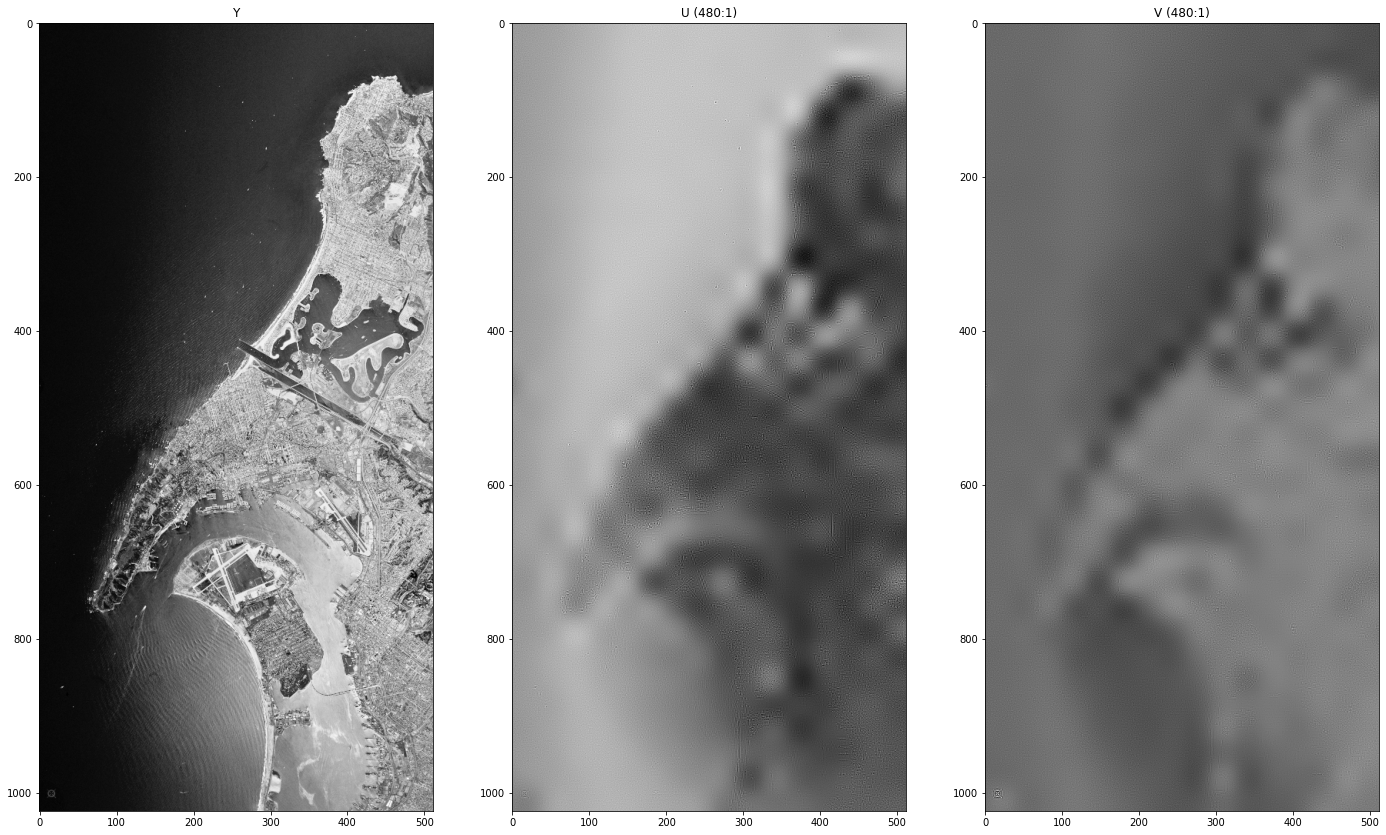

In [13]:
fig = plt.figure(figsize=(24,16))

a = fig.add_subplot(1,3,1) # Rows, cols, subfigure
a.set_title("Y")
imgplot = plt.imshow(chroma_subsampled_YUV[:,:,0], cmap='gray')

a = fig.add_subplot(1,3,2)
a.set_title("U (480:1)")
imgplot = plt.imshow(chroma_subsampled_YUV[:,:,1], cmap='gray')

a = fig.add_subplot(1,3,3)
a.set_title("V (480:1)")
imgplot = plt.imshow(chroma_subsampled_YUV[:,:,2], cmap='gray')

plt.show()
#plt.imshow(chroma_subsampled_YUV[:,:,1], cmap='gray' # Shows U
#plt.show()

In [14]:
chroma_subsampled_RGB = cv2.cvtColor(chroma_subsampled_YUV, cv2.COLOR_YUV2RGB)

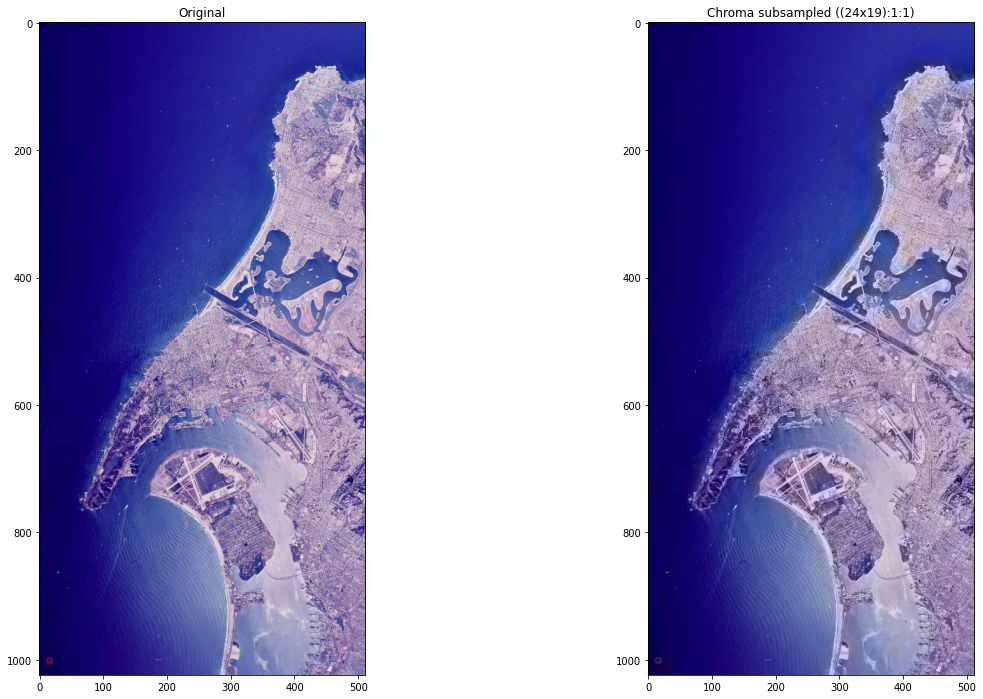

In [27]:
#fig = plt.figure(figsize=(24,16))
fig = plt.figure(figsize=(20,12))

a = fig.add_subplot(1,2,1) # Rows, cols, subfigure
a.set_title("Original")
plt.imshow(RGB)

a = fig.add_subplot(1,2,2) # Rows, cols, subfigure
a.set_title("Chroma subsampled ((24x19):1:1)")
plt.imshow(chroma_subsampled_RGB)

plt.show()

In [16]:
print("The original image uses ", \
      luma_shape[0]*luma_shape[1] * 3,
      "bytes"
     )
print("The subsampled image uses", \
      luma_shape[0]*luma_shape[1] +
      chroma_shape[0]*chroma_shape[1] * 2,
      "bytes"
     )

The original image uses  1572864 bytes
The subsampled image uses 526472 bytes
